In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In this jupyter notebook some general aspects of foot traffic like e.g. monthly time series, outliers, daily courses, black friday, etc., are analysed

In [3]:
# read foot traffic data (daily and hourly): ftraffic = foot traffic; ltr = pedestrians crossing from left to right;
# rtl = pedestrians crossing from right to left; dow = day of week; month = month; s_holid = school holidays
# p_holid = public holidays; br_mo = bridge day Monday; br_fr = bridge day Friday; bweek = black week; fest = city festivals
df = pd.read_csv('DATA/foottraffic_daily_schoenbornstr_prep.csv',parse_dates=['date'])
dfh = pd.read_csv('DATA/foottraffic_hourly_schoenbornstr_prep.csv',parse_dates=['date'])
display(df.head())

,date,ftraffic,ltr,rtl,dow,month,s_holid,p_holid,br_mo,br_fr,bweek,fest
0,2020-01-01,7285.0,NaN,NaN,Wednesday,January,1,1,0,0,0,0
1,2020-01-02,40406.0,NaN,NaN,Thursday,January,1,0,0,0,0,0
2,2020-01-03,41095.0,NaN,NaN,Friday,January,1,0,0,0,0,0
3,2020-01-04,42096.0,NaN,NaN,Saturday,January,1,0,0,0,0,0
4,2020-01-05,7847.0,NaN,NaN,Sunday,January,0,0,0,0,0,0


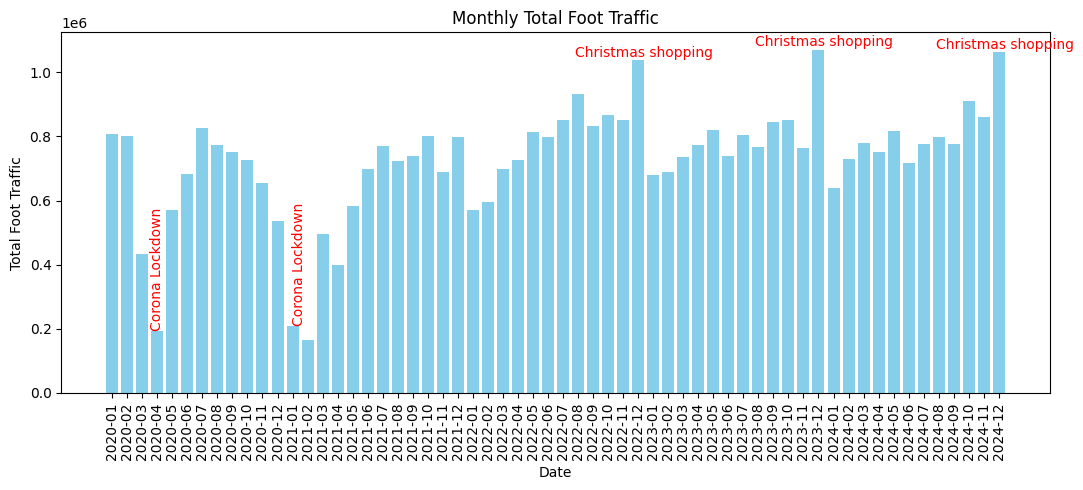

In [4]:
# compute and display monthly total foot traffic to give first insights
mon = df.groupby(df['date'].dt.to_period("M"))['ftraffic'].sum().reset_index()
x = mon['date'].astype(str).values

plt.figure(figsize=(11, 5))
bars=plt.bar(x, mon['ftraffic'], color='skyblue')
plt.xlabel("Date")
plt.ylabel("Total Foot Traffic")
plt.title("Monthly Total Foot Traffic")
plt.xticks(rotation=90)
bar = bars[3]
yval = bar.get_height()
plt.text(bar.get_x() + bar.get_width() / 2, yval + 1000,
         'Corona Lockdown',
         ha='center', va='bottom', fontsize=10, color='red', rotation=90)
bar=bars[12]
yval = bar.get_height()
plt.text(bar.get_x() + bar.get_width(), yval + 1000,
         'Corona Lockdown',
         ha='center', va='bottom', fontsize=10, color='red', rotation=90)
bar=bars[59]
yval = bar.get_height()
plt.text(bar.get_x() + bar.get_width(), yval + 1000,
         'Christmas shopping',
         ha='center', va='bottom', fontsize=10, color='red')
bar=bars[47]
yval = bar.get_height()
plt.text(bar.get_x() + bar.get_width(), yval + 1000,
         'Christmas shopping',
         ha='center', va='bottom', fontsize=10, color='red')
bar=bars[35]
yval = bar.get_height()
plt.text(bar.get_x() + bar.get_width(), yval + 1000,
         'Christmas shopping',
         ha='center', va='bottom', fontsize=10, color='red')
plt.tight_layout()
plt.show()

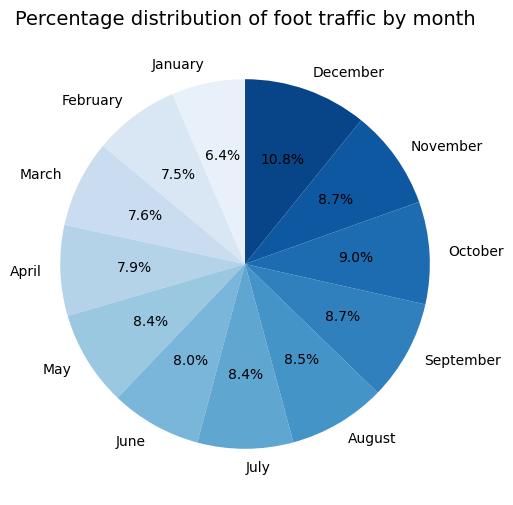

In [5]:
# display foot traffic in different months
dfs = df[(df['date'].dt.year >= 2022) & (df['date'].dt.year <= 2024)]
mon = dfs.groupby('month')['ftraffic'].mean().sort_index()
year = ['January','February', 'March', 'April','May','June','July','August','September','October','November','December']
mon = mon[year]
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(mon.values, labels=mon.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Blues", len(mon)))
ax.set_title('Percentage distribution of foot traffic by month', fontsize=14)
plt.show()

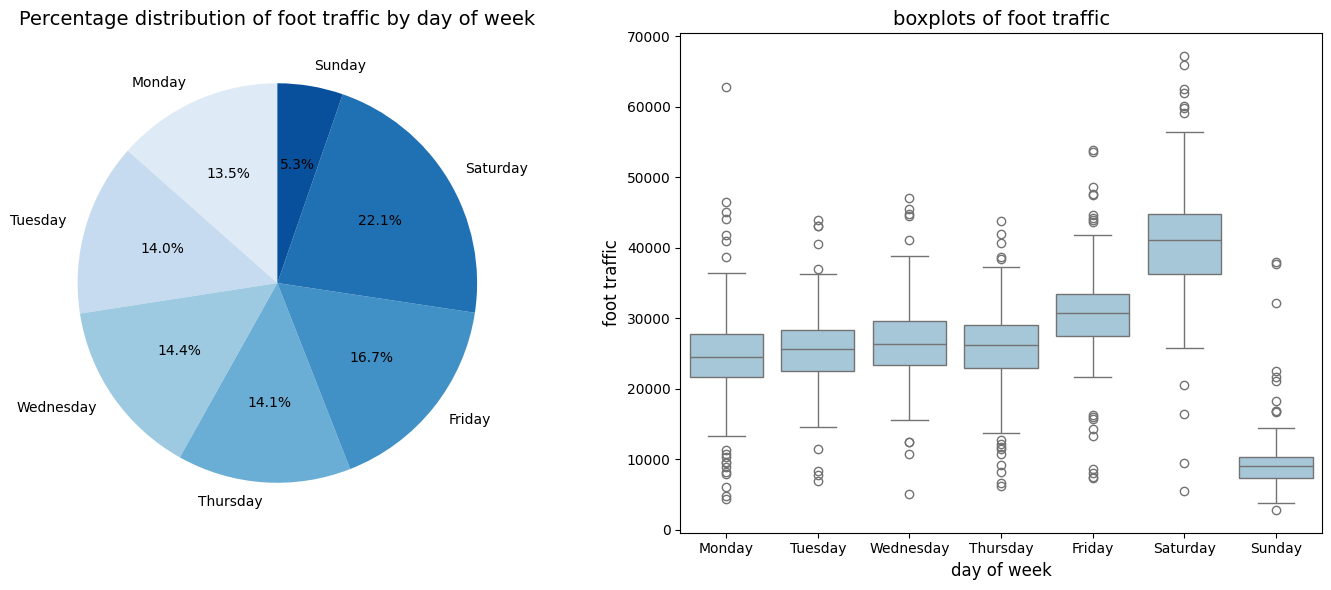

In [6]:
# display foot traffic at different days of the week
dow_mean = dfs.groupby('dow')['ftraffic'].mean().sort_index()
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_mean = dow_mean[week]

import warnings
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].pie(dow_mean.values, labels=dow_mean.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Blues", len(dow_mean)))
axes[0].set_title('Percentage distribution of foot traffic by day of week', fontsize=14)
blue = sns.color_palette("Blues", 7)[2]
sns.boxplot(x='dow', y='ftraffic', data=dfs, order=week, ax=axes[1], color=blue)
axes[1].set_title('boxplots of foot traffic', fontsize=14)
axes[1].set_xlabel('day of week', fontsize=12)
axes[1].set_ylabel('foot traffic', fontsize=12)
plt.tight_layout()
plt.show()

In [7]:
# analyse outliers
day='Friday' # select day of week
dfd = dfs[dfs['dow'] == day]
q1 = dfd['ftraffic'].quantile(0.25)
q3 = dfd['ftraffic'].quantile(0.75)
iqr = q3 - q1
uw = q3 + 1.5 * iqr
lw = q1-1.5*iqr
dx = dfd[dfd['ftraffic'] > uw]
dn = dfd[dfd['ftraffic'] < lw]
print('upper outlier')
display(dx)
print('#################')
print('lower outlier')
display(dn)

upper outlier


,date,ftraffic,ltr,rtl,dow,month,s_holid,p_holid,br_mo,br_fr,bweek,fest
1059,2022-11-25,47550.0,NaN,NaN,Friday,November,0,0,0,0,1,0
1080,2022-12-16,43643.0,NaN,NaN,Friday,December,0,0,0,0,0,0
1444,2023-12-15,48577.0,NaN,NaN,Friday,December,0,0,0,0,0,0
1591,2024-05-10,43987.0,NaN,NaN,Friday,May,0,0,0,1,0,0
1738,2024-10-04,44241.0,21882.0,22359.0,Friday,October,0,0,0,1,0,0
1794,2024-11-29,53576.0,27382.0,26194.0,Friday,November,0,0,0,0,1,0
1808,2024-12-13,47674.0,24780.0,22894.0,Friday,December,0,0,0,0,0,0
1815,2024-12-20,53906.0,27690.0,26216.0,Friday,December,0,0,0,0,0,0
1822,2024-12-27,44691.0,22193.0,22498.0,Friday,December,1,0,0,1,0,0


#################
lower outlier


,date,ftraffic,ltr,rtl,dow,month,s_holid,p_holid,br_mo,br_fr,bweek,fest
821,2022-04-01,14283.0,NaN,NaN,Friday,April,0,0,0,0,0,0
828,2022-04-08,15945.0,NaN,NaN,Friday,April,0,0,0,0,0,0
835,2022-04-15,8568.0,NaN,NaN,Friday,April,1,1,0,0,0,0
1101,2023-01-06,8127.0,NaN,NaN,Friday,January,1,1,0,0,0,0
1192,2023-04-07,7413.0,NaN,NaN,Friday,April,1,1,0,0,0,0
1549,2024-03-29,7449.0,3639.0,3810.0,Friday,March,1,1,0,0,0,0
1570,2024-04-19,15781.0,NaN,NaN,Friday,April,0,0,0,0,0,0
1640,2024-06-28,16326.0,8161.0,8165.0,Friday,June,0,0,0,0,0,0
1766,2024-11-01,13325.0,6575.0,6750.0,Friday,November,0,1,0,0,0,0


From the tables above we see that upper outliers are often associated with bridge days, black week, or christmas shopping (December),  
while lower outliers are mostly associated with public holidays. Other outliers are analysed in data_analysis_impact_weather.ipynb.  
Feel free to analyse other days of week.

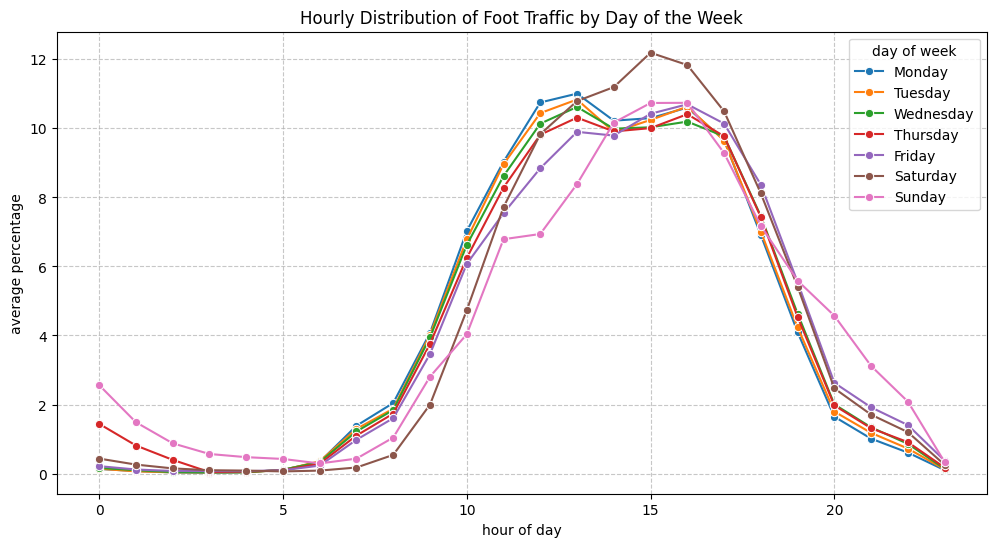

In [8]:
# analyse and display the daily courses of foot traffic by day
hour=[]
wd = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
for id in wd:
    dfhs = dfh[
    (dfh["dow"] == id) & 
    (dfh["p_holid"] == 0) & 
    (dfh["br_mo"] == 0) & 
    (dfh["br_fr"] == 0) & 
    (dfh["bweek"] == 0) & 
    (dfh["fest"] == 0) & 
    (dfh["month"] != "December")
    ]
    dfhs["ddd"] = pd.to_datetime(dfhs["date"]).dt.date
    dsum = dfhs.groupby("ddd")["ftraffic"].sum().rename("dsum")
    dfhs = dfhs.merge(dsum, on="ddd")
    dfhs["perc"] = dfhs["ftraffic"] / dfhs["dsum"] * 100
    dfhs["hour"] = pd.to_datetime(dfhs["date"]).dt.hour
    result = dfhs.groupby("hour")["perc"].mean().reset_index()
    result["dow"] = id  
    hour.append(result)
hour_avg = pd.concat(hour, ignore_index=True)
plt.figure(figsize=(12, 6))
sns.lineplot(data=hour_avg, x="hour", y="perc", hue="dow", marker="o", palette="tab10")
plt.xlabel("hour of day")
plt.ylabel("average percentage")
plt.title("Hourly Distribution of Foot Traffic by Day of the Week")
plt.legend(title="day of week")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


From the Figure above we see that the daily courses of foot traffic are similar for all days of week.  
However, the curves for Saturday and Sunday are slightly different, with maximum foot traffic in the afternoon  
and a later onset (8-9 UTC) when compared to Monday to Friday (7 UTC).

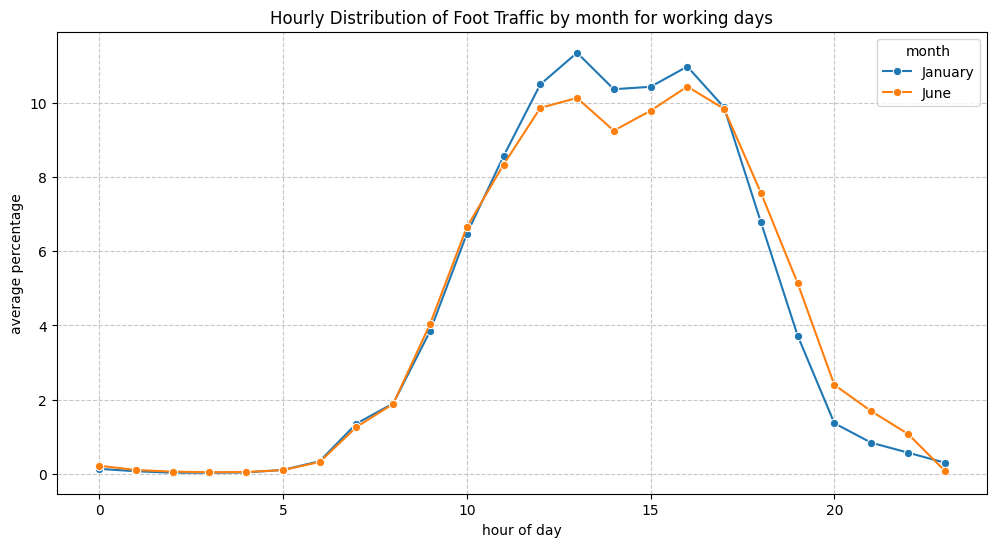

In [9]:
# Seasonal dependency of foot traffic behaviour for working days
hour=[]
wm = ["January", "June"]
for id in wm:
    dfhs = dfh[
    (dfh["month"] == id) &
    (dfh["dow"] != "Friday") &
    (dfh["dow"] != "Saturday") &
    (dfh["dow"] != "Sunday") &
    (dfh["p_holid"] == 0) & 
    (dfh["br_mo"] == 0) & 
    (dfh["br_fr"] == 0) & 
    (dfh["bweek"] == 0) & 
    (dfh["fest"] == 0)
    ]
    dfhs["ddd"] = pd.to_datetime(dfhs["date"]).dt.date
    dsum = dfhs.groupby("ddd")["ftraffic"].sum().rename("dsum")
    dfhs = dfhs.merge(dsum, on="ddd")
    dfhs["perc"] = dfhs["ftraffic"] / dfhs["dsum"] * 100
    dfhs["hour"] = pd.to_datetime(dfhs["date"]).dt.hour
    result = dfhs.groupby("hour")["perc"].mean().reset_index()
    result["month"] = id
    hour.append(result)
hour_avg = pd.concat(hour, ignore_index=True)
plt.figure(figsize=(12, 6))
sns.lineplot(data=hour_avg, x="hour", y="perc", hue="month", marker="o", palette="tab10")
plt.xlabel("hour of day")
plt.ylabel("average percentage")
plt.title("Hourly Distribution of Foot Traffic by month for working days")
plt.legend(title="month")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

From the Figure above we see that for working days the daily courses of foot traffic are similar for summer and winter.  
However, during summer the foot traffic is higher in evening hours when compared to winter. 

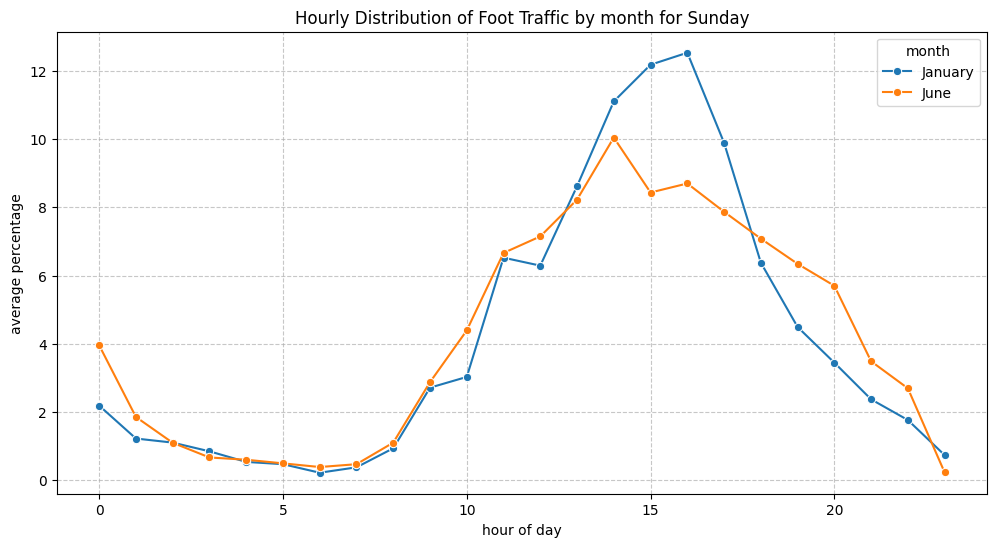

In [10]:
# Seasonal dependency of foot traffic behaviour for Sunday
hour=[]
wm = ["January", "June"]
for id in wm:
    dfhs = dfh[
    (dfh["month"] == id) &
    (dfh["dow"] == "Sunday") &
    (dfh["p_holid"] == 0) & 
    (dfh["br_mo"] == 0) & 
    (dfh["br_fr"] == 0) & 
    (dfh["bweek"] == 0) & 
    (dfh["fest"] == 0)
    ]
    dfhs["ddd"] = pd.to_datetime(dfhs["date"]).dt.date
    dsum = dfhs.groupby("ddd")["ftraffic"].sum().rename("dsum")
    dfhs = dfhs.merge(dsum, on="ddd")
    dfhs["perc"] = dfhs["ftraffic"] / dfhs["dsum"] * 100
    dfhs["hour"] = pd.to_datetime(dfhs["date"]).dt.hour
    result = dfhs.groupby("hour")["perc"].mean().reset_index()
    result["month"] = id
    hour.append(result)
hour_avg = pd.concat(hour, ignore_index=True)
plt.figure(figsize=(12, 6))
sns.lineplot(data=hour_avg, x="hour", y="perc", hue="month", marker="o", palette="tab10")
plt.xlabel("hour of day")
plt.ylabel("average percentage")
plt.title("Hourly Distribution of Foot Traffic by month for Sunday")
plt.legend(title="month")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

From the Figure above we see that for Sunday the daily courses of foot traffic are significantly different in summer and winter.  
For winter, the foot traffic is mostly restricted to a much shorter time window when compared to summer.    

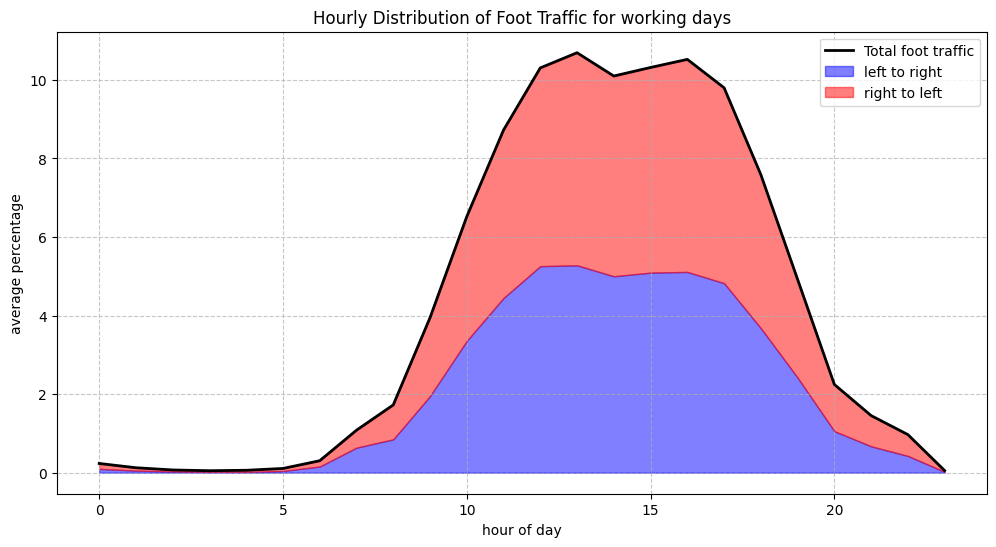

In [11]:
# Fraction of pedestrians crossing from left to right and from right to left for working days
dfs = dfh.dropna(subset=['ltr', 'rtl'])
dfhs = dfs[
(dfs["dow"] != "Sunday") &
(dfs["p_holid"] == 0) & 
(dfs["br_mo"] == 0) & 
(dfs["br_fr"] == 0) & 
(dfs["bweek"] == 0) & 
(dfs["fest"] == 0)
    ]
dfhs["ddd"] = pd.to_datetime(dfhs["date"]).dt.date
dsum = dfhs.groupby("ddd")["ftraffic"].sum().rename("dsum")
dfhs = dfhs.merge(dsum, on="ddd")
dfhs["perc"] = dfhs["ftraffic"] / dfhs["dsum"] * 100
dfhs["percl"] = dfhs["ltr"] / dfhs["dsum"] * 100
dfhs["percr"] = dfhs["rtl"] / dfhs["dsum"] * 100
dfhs["hour"] = pd.to_datetime(dfhs["date"]).dt.hour
dfhs = dfhs.iloc[1:]
dfhs = dfhs[~dfhs['date'].astype(str).str.contains('2024-12-31')]
result = dfhs.groupby("hour")["perc"].mean().reset_index()
resultl = dfhs.groupby("hour")["percl"].mean().reset_index()
resultr = dfhs.groupby("hour")["percr"].mean().reset_index()
result = result.merge(resultl, on="hour")
result = result.merge(resultr, on="hour")
x = result['hour']
y = result['perc']
y1 = result['percl']
y2 = result['percr']

plt.figure(figsize=(12, 6))
plt.plot(x, y, color='black', label="Total foot traffic", linewidth=2)
plt.fill_between(x, 0, y1, color='blue', alpha=0.5, label="left to right")
plt.fill_between(x, y1, y, color='red', alpha=0.5, label="right to left")
plt.xlabel("hour of day")
plt.ylabel("average percentage")
plt.title("Hourly Distribution of Foot Traffic for working days")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

From the Figure above we see that the fraction of pedestrians crossing from left to right and from right to left  
is nearly 50:50 throuhgout the day.

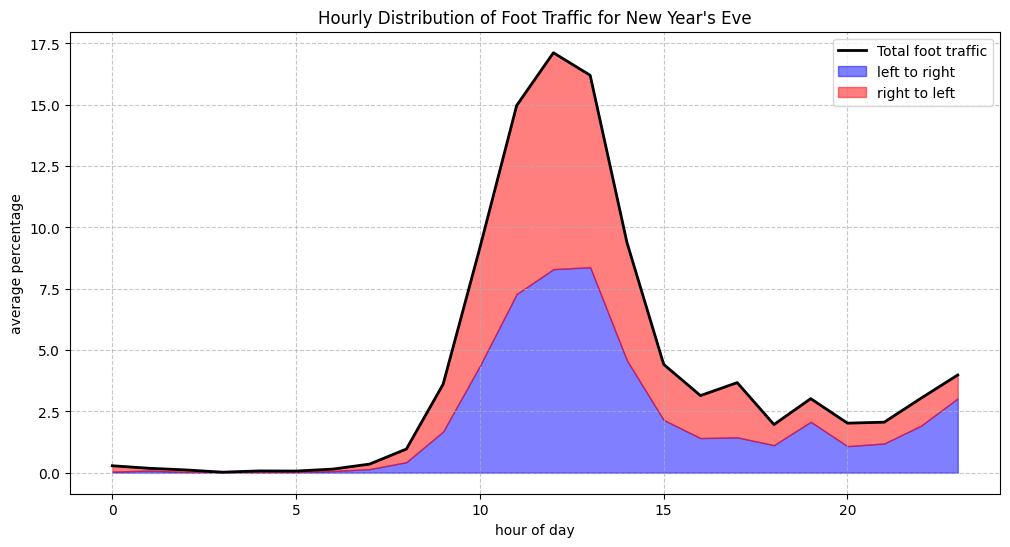

In [12]:
# Fraction of pedestrians crossing from left to right and from right to left for New Year's Eve
dfhs = dfs[dfs['date'].astype(str).str.contains('2024-12-31')]
dfhs["ddd"] = pd.to_datetime(dfhs["date"]).dt.date
dsum = dfhs.groupby("ddd", as_index=False)["ftraffic"].sum().rename(columns={"ftraffic": "dsum"})
dfhs = dfhs.merge(dsum, on="ddd")
dfhs["perc"] = dfhs["ftraffic"] / dfhs["dsum"] * 100
dfhs["percl"] = dfhs["ltr"] / dfhs["dsum"] * 100
dfhs["percr"] = dfhs["rtl"] / dfhs["dsum"] * 100
dfhs["hour"] = pd.to_datetime(dfhs["date"]).dt.hour
result = dfhs.groupby("hour")["perc"].mean().reset_index()
resultl = dfhs.groupby("hour")["percl"].mean().reset_index()
resultr = dfhs.groupby("hour")["percr"].mean().reset_index()
result = result.merge(resultl, on="hour")
result = result.merge(resultr, on="hour")
x = result['hour']
y = result['perc']
y1 = result['percl']
y2 = result['percr']

plt.figure(figsize=(12, 6))
plt.plot(x, y, color='black', label="Total foot traffic", linewidth=2)
plt.fill_between(x, 0, y1, color='blue', alpha=0.5, label="left to right")
plt.fill_between(x, y1, y, color='red', alpha=0.5, label="right to left")
plt.xlabel("hour of day")
plt.ylabel("average percentage")
plt.title("Hourly Distribution of Foot Traffic for New Year's Eve")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

For New Year's Eve (see Figure above) we see some intersting but nevertheless expected results:  
(i) Foot Traffic strongly decreases after 13UTC  
(ii) In the late evening the fraction of pedestrians crossing from left to right is clearly higher than for right to left;  
     --> pedestrians streaming towards public firework show???

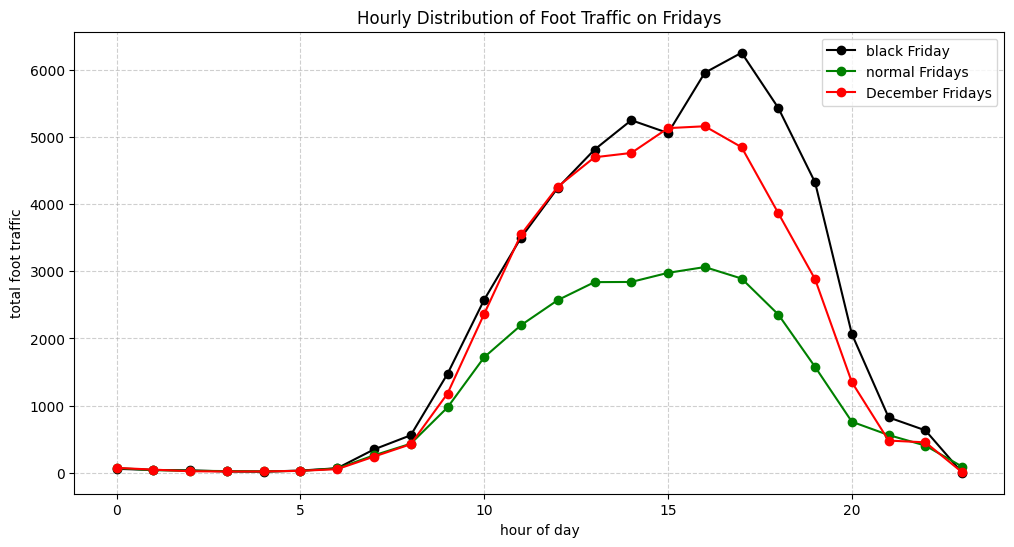

In [13]:
# Foot traffic on Black Friday
dfhb = dfh[(dfh["bweek"] == 1) & (dfh["dow"] == "Friday")]
dfhb["hour"] = pd.to_datetime(dfhb["date"]).dt.hour
dfhb_m = dfhb.groupby('hour')['ftraffic'].mean()
dfhf = dfh[(dfh['dow'] == "Friday") & (dfh['month'] != "December") & (dfh['bweek'] == 0)]
dfhf["hour"] = pd.to_datetime(dfhf["date"]).dt.hour
dfhf_m = dfhf.groupby('hour')['ftraffic'].mean()
dfhc = dfh[(dfh["month"] == "December") & (dfh["dow"] == "Friday")]
dfhc["hour"] = pd.to_datetime(dfhc["date"]).dt.hour
dfhc_m = dfhc.groupby('hour')['ftraffic'].mean()

hours = dfhb_m.index
plt.figure(figsize=(12, 6))
plt.plot(hours, dfhb_m, label="black Friday", marker='o', color='black')
plt.plot(hours, dfhf_m, label="normal Fridays", marker='o', color='green')
plt.plot(hours, dfhc_m, label="December Fridays", marker='o', color='red')
plt.xlabel("hour of day")
plt.ylabel("total foot traffic")
plt.title("Hourly Distribution of Foot Traffic on Fridays")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

From the Figure above we see how the foot traffic is "escalating" on Black Friday, particularly after 15UTC, when
foot traffic is even clearly higher than during Christmas shopping in December.